# Pedro Alves Gonçalves Júnior

https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Informações do Conjunto de Dados
- Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em chamadas telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de acessar se o produto (empréstimo a prazo bancário) seria ('sim') ou não ('não') subscrito. 

### Objetivo
- O objetivo da **classificação** é prever se o cliente irá assinar (sim / não) um empréstimo a prazo (variável y).

### Informações dos Atributos
- Variáveis de entrada: 
    - ##### banco dados do cliente: 
    - 1 - **age:** (numérica)
    - 2 - **job:** tipo de trabalho (categórico: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') 
    - 3 - **marital:** estado civil (categórico: 'divorced', 'married', 'single', 'unknown'. Nota: 'divorced' significa divorced ou widowed) 
    - 4 - **education:** (categórica: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', ' university.degree', 'unknown') 
    - 5 - **default:** possui crédito em default? (categórico: 'no', 'yes', 'unknown')
    - 6 - **housing:** tem empréstimo à habitação? (categórico: 'no', 'yes', 'unknown') 
    - 7 - **loan:** tem empréstimo pessoal? (categórico: 'no', 'yes', 'unknown')
    
    - #### relacionado com o último contato da campanha atual: 
    - 8 - **contact:** tipo de comunicação de contato (categórico: 'cellular', 'telephone') 
    - 9 - **month:** mês do último contato do ano (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
    - 10 - **day_of_week:** último dia de contato da semana (categórico:'mon', 'tue', 'wed', 'thu', 'fri') 
    - 11 - **duration:** duração do último contato, em segundos (numérico). Nota importante: este atributo afeta altamente a meta de saída (por exemplo, se a duração for = 0, então y = 'não'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o término da chamada, é obviamente conhecido. Portanto, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista. 
    
    - #### outros atributos:
    - 12 - **campaign:** número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato) 
    - 13 - **pdays:** número de dias que passaram depois que o cliente foi contatado pela última vez de uma campanha anterior (numérico; 999 significa cliente não previamente contactado) 
    - 14 - **previous:** número de contactos realizados antes desta campanha e para este cliente (numérico) 
    - 15 - **poutcome:** resultado da campanha anterior de marketing (categórico: 'failure', 'noexistent', 'success') 
    
    - #### social e econômico atributos de contexto 
    - 16 - **emp.var.rate:** taxa de variação de emprego - indicador trimestral (numérico) 
    - 17 - **cons.price.idx:** índice de preços ao consumidor - indicador mensal (numérico) 
    - 18 - **cons.conf.idx:** índice de confiança do consumidor - indicador mensal (numérico) 
    - 19 - **euribor3m:** euribor 3 meses - indicador diário (numérico) 
    - 20 - **nr.employed:** número de empregados - indicador trimestral (numérico) 

    - #### Variável de saída (desejado target): 
    - 21 - **y** - o cliente assinou um empréstimo a prazo? (binário: 'yes', 'no')

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';', na_values=['nonexistent', 'unknown', 999])

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41186 non-null float64
campaign          41188 non-null int64
pdays             1515 non-null float64
previous          41188 non-null int64
poutcome          5625 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(7), int64(3), object(11)
memory u

In [10]:
data.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41186.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.249041,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.234158,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Cargo de Trabalho

In [7]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

- Qtd de cada instância

In [8]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

- Verificando valores nulos

In [9]:
data['job'].isna().sum()

330

In [11]:
data = pd.get_dummies(data, columns=['job'], drop_first=True)

In [12]:
data.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,basic.4y,no,no,no,telephone,may,mon,261.0,...,0,0,1,0,0,0,0,0,0,0
1,57,married,high.school,NaN,no,no,telephone,may,mon,149.0,...,0,0,0,0,0,0,1,0,0,0
2,37,married,high.school,no,yes,no,telephone,may,mon,226.0,...,0,0,0,0,0,0,1,0,0,0
3,40,married,basic.6y,no,no,no,telephone,may,mon,151.0,...,0,0,0,0,0,0,0,0,0,0
4,56,married,high.school,no,no,yes,telephone,may,mon,307.0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
data.isna().sum()

age                      0
marital                 80
education             1731
default               8597
housing                990
loan                   990
contact                  0
month                    0
day_of_week              0
duration                 2
campaign                 0
pdays                39673
previous                 0
poutcome             35563
emp.var.rate             0
cons.price.idx           0
cons.conf.idx            0
euribor3m                0
nr.employed              0
y                        0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
dtype: int64

# Estado Civil

In [14]:
data['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

- Qtd de cada instância

In [15]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

- Verificando valores nulos

In [16]:
data['marital'].isna().sum()

80

In [17]:
data = pd.get_dummies(data, columns=['marital'], drop_first=True)

In [18]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,56,basic.4y,no,no,no,telephone,may,mon,261.0,1,...,1,0,0,0,0,0,0,0,1,0
1,57,high.school,NaN,no,no,telephone,may,mon,149.0,1,...,0,0,0,0,1,0,0,0,1,0
2,37,high.school,no,yes,no,telephone,may,mon,226.0,1,...,0,0,0,0,1,0,0,0,1,0
3,40,basic.6y,no,no,no,telephone,may,mon,151.0,1,...,0,0,0,0,0,0,0,0,1,0
4,56,high.school,no,no,yes,telephone,may,mon,307.0,1,...,0,0,0,0,1,0,0,0,1,0


In [19]:
data.isna().sum()

age                      0
education             1731
default               8597
housing                990
loan                   990
contact                  0
month                    0
day_of_week              0
duration                 2
campaign                 0
pdays                39673
previous                 0
poutcome             35563
emp.var.rate             0
cons.price.idx           0
cons.conf.idx            0
euribor3m                0
nr.employed              0
y                        0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
marital_married          0
marital_single           0
dtype: int64

# Escolaridade

In [20]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

- Qtd de cada instâcia

In [21]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

- Verificando valores nulos

In [22]:
data['education'].isna().sum()

1731

In [23]:
data['education'].replace('illiterate', 'basic.4y', inplace=True)

In [24]:
education_map = {'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 
                 'professional.course':5, 'university.degree':6}

In [25]:
data['education'] = data['education'].map(education_map)

In [26]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,56,1.0,no,no,no,telephone,may,mon,261.0,1,...,1,0,0,0,0,0,0,0,1,0
1,57,4.0,NaN,no,no,telephone,may,mon,149.0,1,...,0,0,0,0,1,0,0,0,1,0
2,37,4.0,no,yes,no,telephone,may,mon,226.0,1,...,0,0,0,0,1,0,0,0,1,0
3,40,2.0,no,no,no,telephone,may,mon,151.0,1,...,0,0,0,0,0,0,0,0,1,0
4,56,4.0,no,no,yes,telephone,may,mon,307.0,1,...,0,0,0,0,1,0,0,0,1,0


In [27]:
data['education'].isna().sum()

1731

# Default

In [28]:
data['default'].unique()

array(['no', nan, 'yes'], dtype=object)

In [136]:
default_map = {'no':0, 'yes':1}

In [137]:
data['default'] = data['default'].map(default_map)

- Qtd de cada instância

In [29]:
data['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

- Verificando valores faltantes

In [30]:
data['default'].isna().sum()

8597

In [31]:
data = data.dropna(subset=['default'])

In [32]:
data.shape

(32591, 31)

In [33]:
data.isna().sum()

age                      0
education             1183
default                  0
housing                763
loan                   763
contact                  0
month                    0
day_of_week              0
duration                 2
campaign                 0
pdays                31140
previous                 0
poutcome             27541
emp.var.rate             0
cons.price.idx           0
cons.conf.idx            0
euribor3m                0
nr.employed              0
y                        0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
marital_married          0
marital_single           0
dtype: int64

# Tem empréstimo à habitação?

In [34]:
data['housing'].unique()

array(['no', 'yes', nan], dtype=object)

- Qtd de cada instância

In [35]:
data['housing'].value_counts()

yes    17212
no     14616
Name: housing, dtype: int64

- Verificando valores faltantes

In [36]:
data['housing'].isna().sum()

763

In [37]:
housing_map = {'yes':1, 'no':0}

In [38]:
data['housing'] = data['housing'].map(housing_map)

# Tem empréstimo pessoal?

In [39]:
data['loan'].unique()

array(['no', 'yes', nan], dtype=object)

- Qtd de cada instância

In [40]:
data['loan'].value_counts()

no     26852
yes     4976
Name: loan, dtype: int64

- Verificando valores faltantes

In [41]:
data['loan'].isna().sum()

763

In [42]:
loan_map = {'yes':1, 'no':0}

In [43]:
data['loan'] = data['loan'].map(loan_map)

# Forma de contato

In [44]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

- Qtd de cada instância

In [45]:
data['contact'].value_counts()

cellular     21780
telephone    10811
Name: contact, dtype: int64

- Verificando valores faltantes

In [46]:
data['contact'].isna().sum()

0

In [142]:
data = pd.get_dummies(data, columns=['contact'], drop_first=True)

# Último contato do ano

In [47]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

- Qtd de cada instância

In [48]:
data['month'].value_counts()

may    10364
jul     5437
aug     4941
jun     3926
nov     3676
apr     2283
oct      700
sep      558
mar      530
dec      176
Name: month, dtype: int64

- Verificando valores faltantes

In [49]:
data['month'].isna().sum()

0

In [146]:
data = pd.get_dummies(data, columns=['month'], drop_first=True)

# Último contato da semana

In [50]:
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

- Qtd de cada instância

In [51]:
data['day_of_week'].value_counts()

thu    6856
mon    6688
wed    6499
tue    6382
fri    6166
Name: day_of_week, dtype: int64

- Verificando valores faltantes

In [52]:
data['day_of_week'].isna().sum()

0

In [150]:
data = pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

# Tempo do último contato

In [53]:
data['duration'].unique()

array([ 261.,  226.,  151., ..., 1246., 1556., 1868.])

- Verificando valores faltantes

In [54]:
data['duration'].isna().sum()

2

In [55]:
data.drop('duration', axis=1, inplace=True)

In [56]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,56,1.0,no,0.0,0.0,telephone,may,mon,1,NaN,...,1,0,0,0,0,0,0,0,1,0
2,37,4.0,no,1.0,0.0,telephone,may,mon,1,NaN,...,0,0,0,0,1,0,0,0,1,0
3,40,2.0,no,0.0,0.0,telephone,may,mon,1,NaN,...,0,0,0,0,0,0,0,0,1,0
4,56,4.0,no,0.0,1.0,telephone,may,mon,1,NaN,...,0,0,0,0,1,0,0,0,1,0
6,59,5.0,no,0.0,0.0,telephone,may,mon,1,NaN,...,0,0,0,0,0,0,0,0,1,0


# Num. de contatos realizados por cliente

In [57]:
data['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 19, 11, 18, 23, 13, 14,
       22, 25, 17, 15, 20, 39, 42, 16, 28, 26, 32, 21, 24, 29, 31, 30, 35,
       41, 37, 27, 40, 43, 34, 33])

- Verificando valores faltantes

In [58]:
data['campaign'].isna().sum()

0

# Qtd de dias antes do último contato da campanha anterior

In [59]:
data['pdays'].unique()

array([nan,  6.,  4.,  5.,  1.,  0.,  3., 10.,  7.,  8.,  9., 11.,  2.,
       12., 13., 14., 15., 16., 21., 17., 18., 22., 25., 26., 19., 27.,
       20.])

- Qtd de cada instância

In [60]:
data['pdays'].value_counts()

3.0     426
6.0     393
4.0     114
9.0      61
2.0      57
7.0      57
12.0     55
10.0     47
5.0      44
13.0     36
11.0     27
1.0      23
15.0     23
14.0     19
8.0      17
0.0      14
16.0     11
17.0      8
18.0      7
19.0      3
22.0      3
21.0      2
25.0      1
26.0      1
20.0      1
27.0      1
Name: pdays, dtype: int64

- Verificando valores faltantes

In [61]:
data['pdays'].isna().sum()

31140

In [62]:
data.drop('pdays', axis=1, inplace=True)

In [63]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,campaign,previous,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,56,1.0,no,0.0,0.0,telephone,may,mon,1,0,...,1,0,0,0,0,0,0,0,1,0
2,37,4.0,no,1.0,0.0,telephone,may,mon,1,0,...,0,0,0,0,1,0,0,0,1,0
3,40,2.0,no,0.0,0.0,telephone,may,mon,1,0,...,0,0,0,0,0,0,0,0,1,0
4,56,4.0,no,0.0,1.0,telephone,may,mon,1,0,...,0,0,0,0,1,0,0,0,1,0
6,59,5.0,no,0.0,0.0,telephone,may,mon,1,0,...,0,0,0,0,0,0,0,0,1,0


# Num. de contatos realizados antes dessa campanha

In [64]:
data['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

- Qtd de cada instância

In [65]:
data['previous'].value_counts()

0    27541
1     4038
2      710
3      210
4       68
5       18
6        5
7        1
Name: previous, dtype: int64

- Verificando valores faltantes

In [66]:
data['previous'].isna().sum()

0

# Resultado da campanha anterior de marketing

In [67]:
data['poutcome'].unique()

array([nan, 'failure', 'success'], dtype=object)

- Qtd de cada instância

In [68]:
data['poutcome'].value_counts()

failure    3736
success    1314
Name: poutcome, dtype: int64

- Verificando valores faltantes

In [69]:
data['poutcome'].isna().sum()

27541

- Removendo coluna com muitos atributos nulos

In [70]:
data.drop('poutcome', axis=1, inplace=True)

In [71]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,campaign,previous,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,56,1.0,no,0.0,0.0,telephone,may,mon,1,0,...,1,0,0,0,0,0,0,0,1,0
2,37,4.0,no,1.0,0.0,telephone,may,mon,1,0,...,0,0,0,0,1,0,0,0,1,0
3,40,2.0,no,0.0,0.0,telephone,may,mon,1,0,...,0,0,0,0,0,0,0,0,1,0
4,56,4.0,no,0.0,1.0,telephone,may,mon,1,0,...,0,0,0,0,1,0,0,0,1,0
6,59,5.0,no,0.0,0.0,telephone,may,mon,1,0,...,0,0,0,0,0,0,0,0,1,0


# Taxa de variação de emprego - Indicador trimestral

In [72]:
data['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

- Qtd de cada instância

In [73]:
data['emp.var.rate'].value_counts()

 1.4    11929
-1.8     7867
 1.1     5310
-0.1     3262
-2.9     1617
-3.4     1049
-1.7      758
-1.1      623
-3.0      166
-0.2       10
Name: emp.var.rate, dtype: int64

- Verificando valores faltantes

In [74]:
data['emp.var.rate'].isna().sum()

0

# Indice de preços ao consumidor - Indicador mensal

In [75]:
data['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

- Qtd de cada instância

In [76]:
data['cons.price.idx'].value_counts()

93.994    5310
93.918    4954
92.893    4846
93.444    3969
93.200    3195
94.465    3006
93.075    2114
92.201     744
92.963     698
92.431     434
92.649     353
94.215     308
94.199     296
92.843     273
92.379     262
93.369     257
94.027     228
94.055     222
93.876     208
94.601     199
92.469     175
93.749     169
92.713     166
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

- Verificando valores faltantes

In [77]:
data['cons.price.idx'].isna().sum()

0

# Indice de confiança do consumidor - Indicador mensal

In [78]:
data['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

- Qtd de cada instância

In [79]:
data['cons.conf.idx'].value_counts()

-36.4    5310
-42.7    4954
-46.2    4846
-36.1    3969
-42.0    3195
-41.8    3006
-47.1    2114
-31.4     744
-40.8     698
-26.9     434
-30.1     353
-40.3     308
-37.5     296
-50.0     273
-29.8     262
-34.8     257
-38.3     228
-39.8     222
-40.0     208
-49.5     199
-33.6     175
-34.6     169
-33.0     166
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

- Verificando valores faltantes

In [80]:
data['cons.conf.idx'].isna().sum()

0

# Euribor 3 meses
- Euribor é a junção das palavras Euro Interbank Offered Rate. As taxas Euribor baseiam-se na média das taxas de juros praticadas em empréstimos interbancários em euros por cerca 25/40 bancos proeminentes europeus (o painel de Bancos). Para a determinação das taxas Euribor são excluídos 15 por cento tanto das percentagens mais altas como das percentagens mais baixas relatadas. Todos os dias úteis, às 11:00 horas Hora Central Europeia, as taxas de juro Euribor são divulgadas e transmitidas a todas as partes participantes e imprensa.

In [81]:
data['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

- Verificando valores faltantes

In [82]:
data['euribor3m'].isna().sum()

0

# Num. de empregados - Indicador trimestral

In [83]:
data['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

- Qtd de cada instância

In [84]:
data['nr.employed'].value_counts()

5228.1    11929
5099.1     7233
5191.0     5310
5195.8     3262
5076.2     1617
5017.5     1049
4991.6      758
5008.7      634
4963.6      623
5023.5      166
5176.3       10
Name: nr.employed, dtype: int64

- Verificando valores faltantes

In [85]:
data['nr.employed'].isna().sum()

0

# O cliente assinou depósito à prazo?

In [86]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

- Qtd de cada instância

In [87]:
data['y'].value_counts()

no     28394
yes     4197
Name: y, dtype: int64

- Verificando valores faltantes

In [88]:
data['y'].isna().sum()

0

In [89]:
y_map = {'yes':1, 'no':0}

In [90]:
data['y'] = data['y'].map(y_map)

In [131]:
data.isna().sum()

age                     0
education            1183
default                 0
housing               763
loan                  763
contact                 0
month                   0
day_of_week             0
campaign                0
previous                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
y                       0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_married         0
marital_single          0
dtype: int64

# Tratando os dados categóricos

In [132]:
from sklearn.impute import SimpleImputer

In [151]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df = imputer.fit_transform(data)

In [152]:
data_ = pd.DataFrame(df, columns=data.columns)

In [153]:
data_.head()

,age,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56.0,1.0,0.0,0.0,0.0,1.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,37.0,4.0,0.0,1.0,0.0,1.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,40.0,2.0,0.0,0.0,0.0,1.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56.0,4.0,0.0,0.0,1.0,1.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,59.0,5.0,0.0,0.0,0.0,1.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [154]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32591 entries, 0 to 32590
Data columns (total 39 columns):
age                  32591 non-null float64
education            32591 non-null float64
default              32591 non-null float64
housing              32591 non-null float64
loan                 32591 non-null float64
campaign             32591 non-null float64
previous             32591 non-null float64
emp.var.rate         32591 non-null float64
cons.price.idx       32591 non-null float64
cons.conf.idx        32591 non-null float64
euribor3m            32591 non-null float64
nr.employed          32591 non-null float64
y                    32591 non-null float64
job_blue-collar      32591 non-null float64
job_entrepreneur     32591 non-null float64
job_housemaid        32591 non-null float64
job_management       32591 non-null float64
job_retired          32591 non-null float64
job_self-employed    32591 non-null float64
job_services         32591 non-null float64
job_student

# Mostrando gráficos

In [154]:
import matplotlib.pyplot as plt
import seaborn as sbn

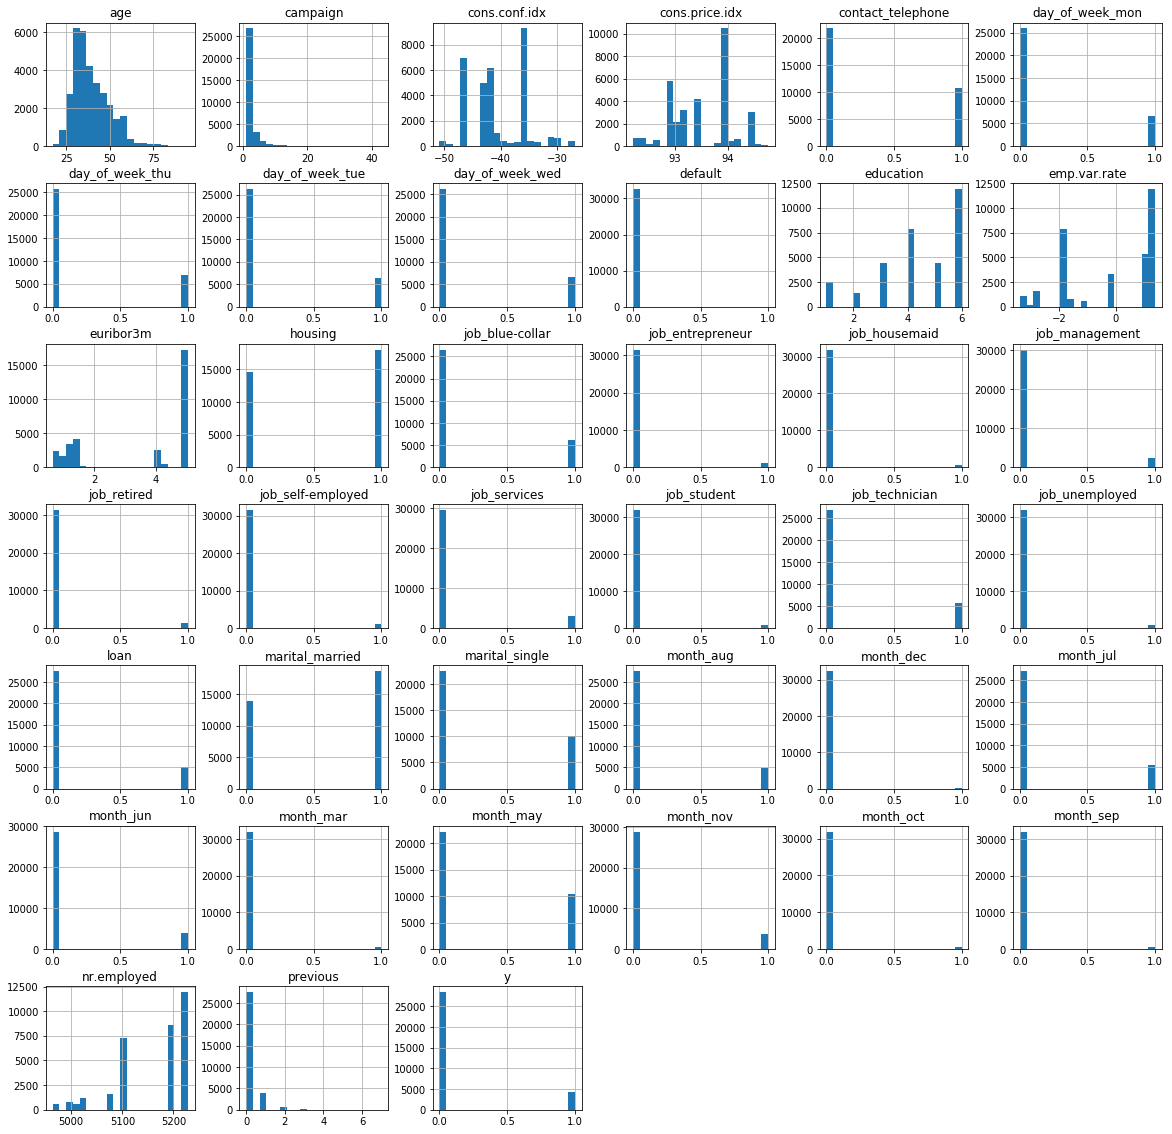

In [158]:
data_.hist(bins=20, figsize=(20, 20));

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [161]:
y = data_['y'].values
data_new = data_.drop('y', axis=1)
X = data_new.values

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=42)

In [164]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24443, 38), (8148, 38), (24443,), (8148,))

In [165]:
scala = StandardScaler()
X_train_std = scala.fit_transform(X_train)
X_test_std = scala.transform(X_test)

In [172]:
model = GaussianNB()
model.fit(X_train_std, y_train)
y_pred_train = model.predict(X_train_std)
y_pred_test = model.predict(X_test_std)
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy Score: 0.5521008059567156
Accuracy Score: 0.5435689739813451


# O que falta?
- Dividir o conjunto em treino e teste
- Padronizar os dados
- Treinar o modelo
- Fazer uma predição
- Calcular
    - Accuracy Score
    - Precision Score
    - Recall Score
    - F1 Score
    - mse
    - rmse
- Curva ROC